# Cargar los datos Json con ElasticSearch

In [12]:
#CREAR UN INDEX PARA ALMACENAR LOS DATOS
from elasticsearch import Elasticsearch
from pprint import pprint

es = Elasticsearch()

if not(es.indices.exists(index="prueba_6")):
    res = es.indices.create(index="prueba_6")  
    pprint(res)

### Listar los Archivos del Dataset

In [13]:
#LISTAR LOS ARCHIVOS DEL DATASET
import json
import os
files = os.listdir("tweets")
pprint(len(files))

354586


## No ejecutar!!!!

In [ ]:
from elasticsearch import helpers

#CARGAR LOS DATOS EN ELASTICSEARCH
tweets=[]

for filename in files:
    with open('tweets/'+filename) as f:
        try:
            #pprint(filename+':')
            tweet = json.load(f)
            timestamp=int(tweet["timestamp_ms"])
            #pprint(tweet)
            simple_tweet = {
                "timestamp":timestamp, \
                "date":tweet["created_at"], \
               "text": tweet['text'], \
               "username": tweet['user']['name'], \
               "location": tweet['user']['location']}
        except KeyError:
            error="error"
            
    tweets.append(simple_tweet)
    
    #CARGAMOS LOS DATOS EN ELASTICSEARCH CON CONSULTAS 'BULK' PARA OPTIMIZAR EL PROCESO
    if (len(tweets)>=1000):
        i=0
        docs_as_string="["
        while i<1000:
            if i!=0:
                docs_as_string = docs_as_string + ','
            docs_as_string = docs_as_string + '\n' + json.dumps(tweets[i])
            i=i+1
        docs_as_string=docs_as_string+"]"
        res = helpers.bulk(es, json.loads(docs_as_string),index="tp5-championstweet2", doc_type="_doc")
        tweets=[]

In [3]:
# CONSULTA BÁSICA A ELASTICSEARCH PARA PROBAR
res = es.search(index="prueba_6", body={"query": {"match_all": {}}})
print("Got %d Hits:" % res['hits']['total'])
for hit in res['hits']['hits']:
    print(hit)

Got 330000 Hits:
{'_index': 'prueba_6', '_type': '_doc', '_id': 'eTrgiWQBKq2TXQzMUaJG', '_score': 1.0, '_source': {'timestamp': 1527360636149, 'date': 'Sat May 26 18:50:36 +0000 2018', 'text': 'RT @LFC: 🔴 COME ON YOU REDS! 🔴\n\n#UCLfinal https://t.co/JgOT1J52ws', 'username': '🥀', 'location': None}}
{'_index': 'prueba_6', '_type': '_doc', '_id': 'gDrgiWQBKq2TXQzMUaJG', '_score': 1.0, '_source': {'timestamp': 1527364678689, 'date': 'Sat May 26 19:57:58 +0000 2018', 'text': 'RT @ChampionsLeague: 🔊\xa0GOOOAAAL!\n⚪️ Real Madrid 1-0 Liverpool 🔴\n⚽️ Benzema 51\n\n#UCLfinal https://t.co/xctPBTt794', 'username': 'King Zas🌐', 'location': 'Nigeria'}}
{'_index': 'prueba_6', '_type': '_doc', '_id': 'jTrgiWQBKq2TXQzMUaJG', '_score': 1.0, '_source': {'timestamp': 1527365617788, 'date': 'Sat May 26 20:13:37 +0000 2018', 'text': 'RT @Omojuwa: This goal just eclipsed Zidane’s 2002 final goal #UCLfinal', 'username': 'Oludayo Gabriel', 'location': None}}
{'_index': 'prueba_6', '_type': '_doc', '_id': 'kDr

In [14]:
#CONSULTA: ¿Cuántos tweets cada minuto?
res = es.search(index="prueba_6", body={"aggs" : { "tweets_over_time" : \
                                                            { "date_histogram" : { "field" : \
                                                                                  "timestamp", "interval" : "1m" \
                                                                                 }}}})
for data in res['aggregations']['tweets_over_time']['buckets']:
   print(data['doc_count'])

38
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
23
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
256
2853
2721
2653
2500
2493
2212
2213
2393
2464
2345
2401
2007
1863
1973
2301
2343
1951
2010
2034
2241
2278
2166
2169
2732
2407
2521
2806
2674
2772
2894
2873
2874
2877
2871
2877
2880
2877
2882
2853
2890
2871
2884
2875
2870
2879
2875
2866
2880
2882
2881
2878
2879
2877
2879
2872
2875
2880
2872
2881
2878
2869
2882
2880
2879
2866
2872
2821
2872


# Visualizar una timeline mostrando el número de tweets por cada minuto

In [15]:
import pandas as pd

df_tweetsByMinutes = pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
df_tweetsByMinutes = df_tweetsByMinutes.rename(columns={'key': 'timestamp', 'doc_count': 'nb_tweets'})
df_tweetsByMinutes[:10]

,nb_tweets,timestamp
0,38,1527340680000
1,0,1527340740000
2,0,1527340800000
3,0,1527340860000
4,0,1527340920000
5,0,1527340980000
6,0,1527341040000
7,0,1527341100000
8,0,1527341160000
9,0,1527341220000


## Filtro para quitar los datos antes del partido

In [19]:
df_tweetsByMinutes_filtered = df_tweetsByMinutes.drop(df_tweetsByMinutes[df_tweetsByMinutes.timestamp < 1527359400000 ].index)
df_tweetsByMinutes_filtered[:10]

,nb_tweets,timestamp
312,0,1527359400000
313,0,1527359460000
314,0,1527359520000
315,0,1527359580000
316,0,1527359640000
317,0,1527359700000
318,0,1527359760000
319,0,1527359820000
320,0,1527359880000
321,0,1527359940000


## Convertir timestamp a tipo date

In [20]:
import datetime

def timestamp2date(x):
    y = datetime.datetime.fromtimestamp(x/1000).strftime('%H:%M:%S')
    return y

df_tweetsByMinutes_filtered['timestamp']=df_tweetsByMinutes_filtered['timestamp'].apply(timestamp2date)
df_tweetsByMinutes_filtered[:10]

,nb_tweets,timestamp
312,0,14:30:00
313,0,14:31:00
314,0,14:32:00
315,0,14:33:00
316,0,14:34:00
317,0,14:35:00
318,0,14:36:00
319,0,14:37:00
320,0,14:38:00
321,0,14:39:00


## Generar Gráfico

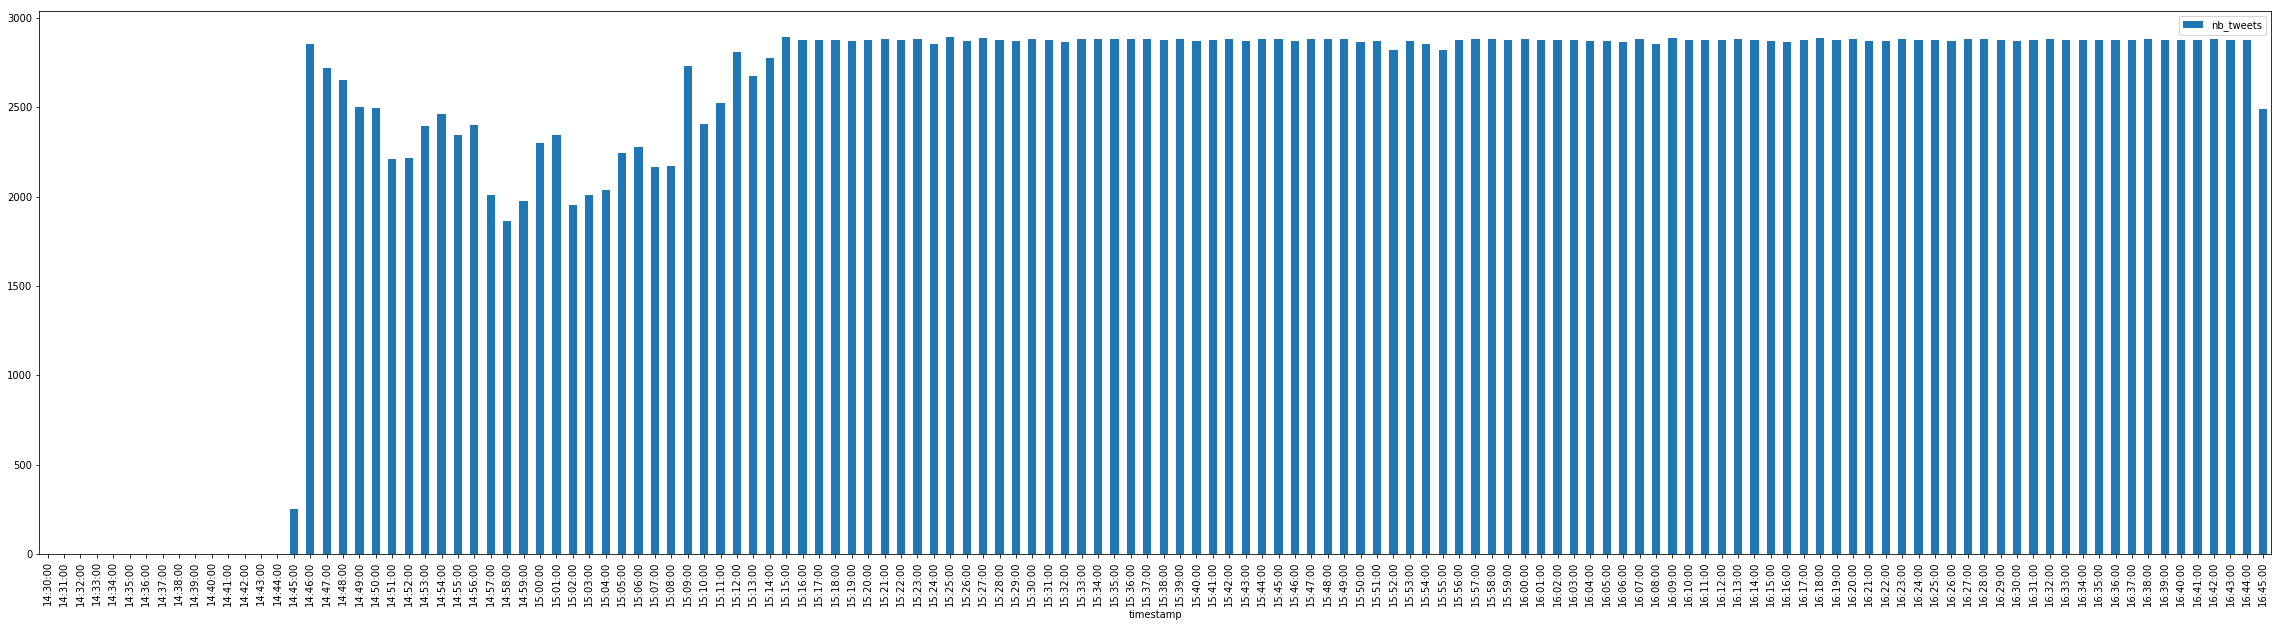

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

df_tweetsByMinutes_filtered.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()

# 1) ¿Cuántos tweets tienen la palabra "liverpool"? ¿Cómo se distribuye los tweets en el tiempo (ver en un histograma)

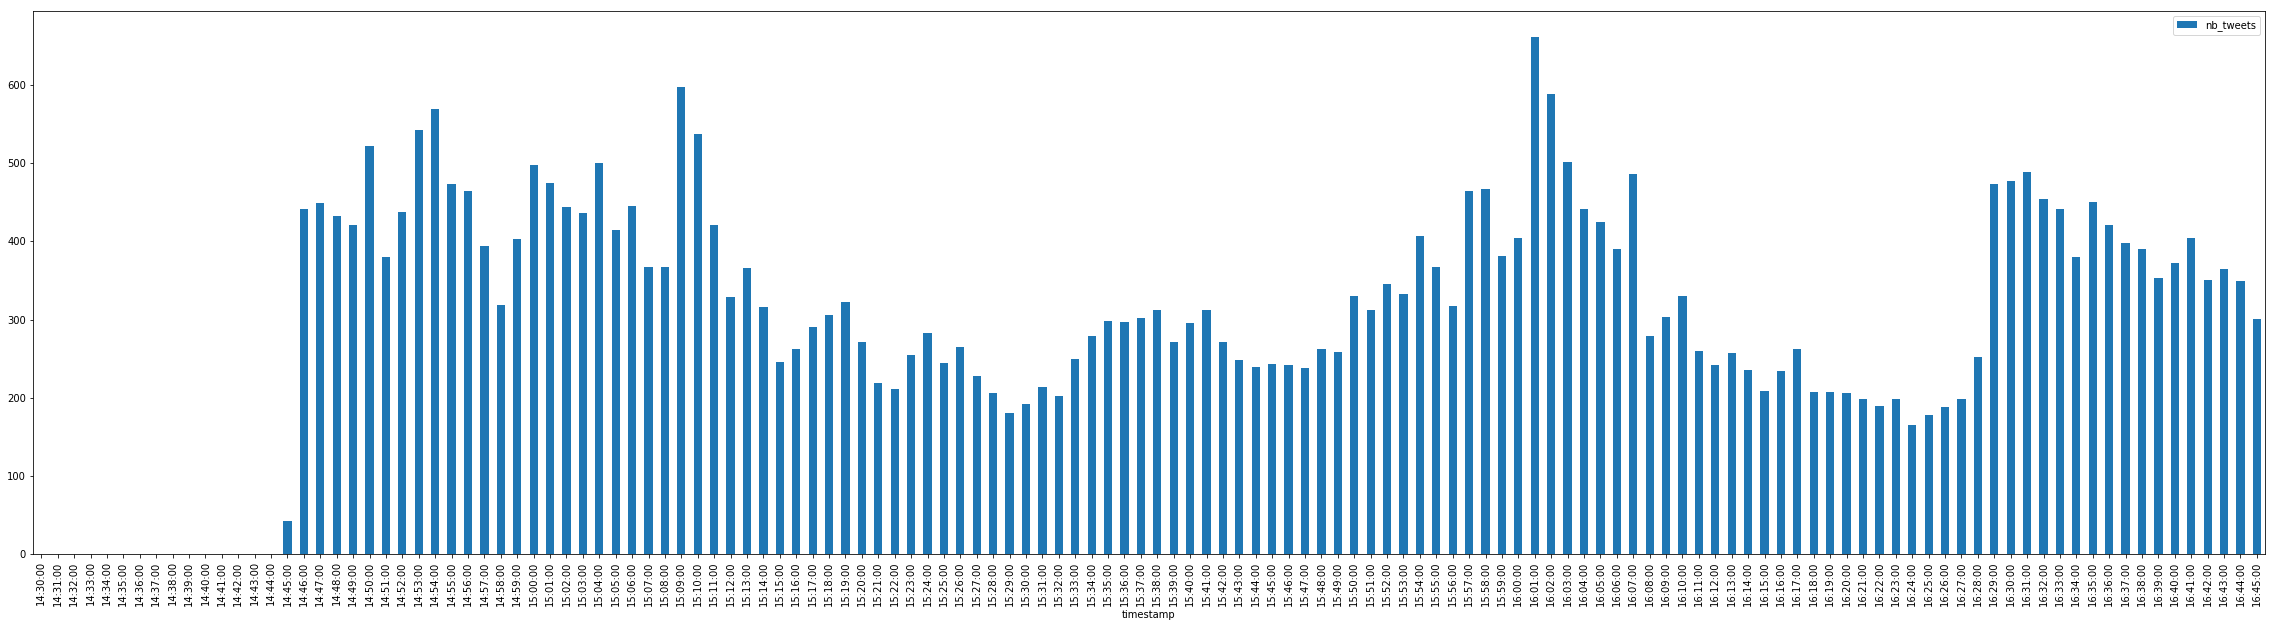

In [22]:
res = es.search(index="prueba_6", 
                body={
                    "query": {
                        "term":{
                            "text":"liverpool"
                        }
                    },
                    "aggs" : { 
                        "tweets_over_time":{ 
                            "date_histogram":{ 
                                "field" :"timestamp", 
                                "interval" : "1m"
                            }
                        }
                    }
                }) 
df_liverpoolByMinutes = pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
df_liverpoolByMinutes = df_liverpoolByMinutes.rename(columns={'key': 'timestamp', 'doc_count': 'nb_tweets'})
## Filtrar Datos
df_liverpoolByMinutes_filtered = df_liverpoolByMinutes.drop(df_liverpoolByMinutes[df_liverpoolByMinutes.timestamp < 1527359400000 ].index)
## Cambiar Dato timestamp a tipo date
df_liverpoolByMinutes_filtered['timestamp']=df_liverpoolByMinutes_filtered['timestamp'].apply(timestamp2date)
## Graficar
df_liverpoolByMinutes_filtered.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()

# 2) ¿De dónde vienen los tweets? (utilizar el campo 'location')

In [27]:
res = es.search(index="prueba_6", 
                body={
                    "aggs": {
                        "locations": {
                            "terms": {
                                "field": "location.keyword",
                                'size': 354586
                            }
                        }
                    }
                })

df_locations = pd.DataFrame(res['aggregations']['locations']['buckets'])
df_locations

,doc_count,key
0,3275,"Lagos, Nigeria"
1,2381,Nigeria
2,1795,"London, England"
3,1624,"Nairobi, Kenya"
4,1534,South Africa
5,1325,"Johannesburg, South Africa"
6,1111,London
7,939,Brasil
8,935,United Kingdom
9,880,"Rio de Janeiro, Brasil"


# 3) ¿Cuántos tweets tienen las palabras "liverpool" y "goal"? (ver en un histograma)


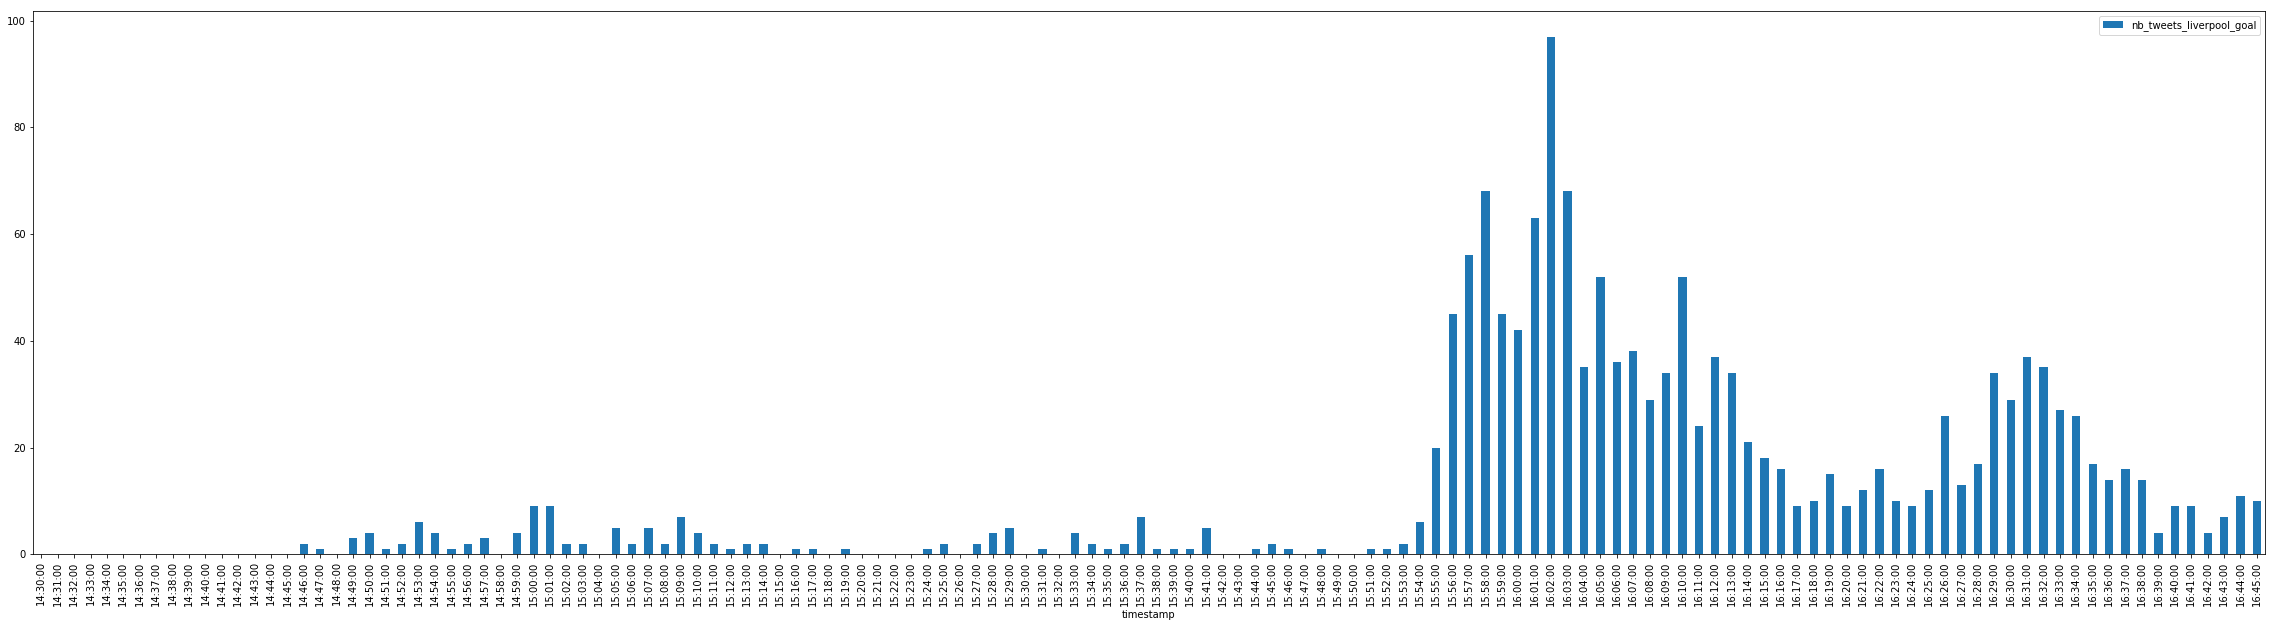

In [38]:
res = es.search(index="prueba_6", 
                body={
                    "query": {
                        "bool":{
                            "filter" : [
                                { "term" : { "text" : "liverpool" } },
                                { "term" : { "text" : "goal" } }
                              ]
                        }
                    },
                    "aggs" : { 
                        "tweets_over_time":{ 
                            "date_histogram":{ 
                                "field" :"timestamp", 
                                "interval" : "1m" #<----- 1 Minutos
                            }
                        }
                    }
                }) 
df_liverpool_goalByMinutes = pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
df_liverpool_goalByMinutes = df_liverpool_goalByMinutes.rename(columns={'key': 'timestamp', 'doc_count': 'nb_tweets_liverpool_goal'})
## Filtrar Datos
df_liverpool_goalByMinutes_filtered = df_liverpool_goalByMinutes.drop(df_liverpool_goalByMinutes[df_liverpool_goalByMinutes.timestamp < 1527359400000 ].index)
## Cambiar Dato timestamp a tipo date
df_liverpool_goalByMinutes_filtered['timestamp']=df_liverpool_goalByMinutes_filtered['timestamp'].apply(timestamp2date)
## Graficar
df_liverpool_goalByMinutes_filtered.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()

# 4) Graficar un Pie Chart comparando el número de tweets con: 
#### a) la palabra 'liverpool', 
#### b) la palabra 'madrid', 
#### c) la palabra 'madrid' y 'liverpool' 
#### d) ninguna de las palabras

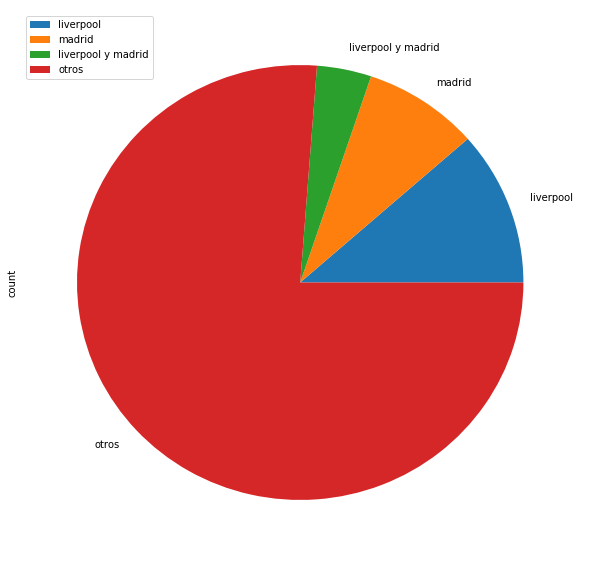

In [65]:
liverpool = es.search(index="prueba_6", 
                body={"query": {"term" : { "text" : "liverpool" }}})
madrid =  es.search(index="prueba_6", 
                body={"query": {"term" : { "text" : "madrid" }}})
liverpoolmadrid = es.search(index="prueba_6", 
                body={
                    "query": {
                        "bool":{
                            "filter" : [
                                { "term" : { "text" : "liverpool" } },
                                { "term" : { "text" : "madrid" } }
                              ]
                        }
                    }
                })
noliverpoolmadrid = es.search(index="prueba_6", 
                body={
                    "query": {
                        "bool":{
                            "must_not" : [
                                { "term" : { "text" : "liverpool" } },
                                { "term" : { "text" : "madrid" } }
                              ]
                        }
                    }
                })
noliverpoolmadrid['hits']['total']
num_tweets = pd.DataFrame({
    'count':[ liverpool['hits']['total'],madrid['hits']['total'],liverpoolmadrid['hits']['total'],noliverpoolmadrid['hits']['total']]
    }, columns=['count'], index=['liverpool','madrid','liverpool y madrid', 'otros'])
num_tweets.plot.pie(y='count', figsize=(10, 10))

# 5) ¿Cuáles son los emoticons más frecuentes? A partir de las visualizaciones disponibles en las librerias MatplotLib y/o Seaborn (seaborn.pydata.org), proponer

Crearia un dataframe que contenga en una columna los emoji y en otra columna un count de la busqueda de